### Your name:

<pre> Siqi Liu </pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Seaborn
import seaborn as sns

### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat. 
  - Include documentation for your code 

In [2]:
### Your code here

## Feel free to use multiple cells

df = pd.read_excel("data/default_of_credit_card_clients.xls", 
                   skiprows= 1, header = 0)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EDA

In [4]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.85,0.79,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.55,0.52,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.0


The attributes have the following meaning:

- **LIMIT_BAL** - credit limit
- **SEX** - 1 = male; 2 = female
- **EDUCATION** - 1 = graduate school; 2 = university; 3 = high school; 4 = others
- **MARRIAGE** - 1 = married; 2 = single; 3 = others
- **AGE** - in years
- **PAY_0 ... PAY_6** - repayment status, from Sep 2005 to Apr 2015. -1 = paid; 1 = delayed for one month; ... ; 9 = delayed for nine months and above
- **BILL_AMT1 ... BILL_AMT6** - amount in bill statment, from Sep 2005 to Apr 2015
- **PAY_AMT1 ... PAY_AMT6** - amount paid, from Sep 2005 to Apr 2015
- **default payment next month** - target variable. 1 = Yes, 0 = No

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

No missing data

In [6]:
# Rename target column to DEFAULT

df = df.rename(columns = {"default payment next month" : "DEFAULT"})

In [7]:
# Rename PAY_0 to PAY_1

df = df.rename(columns = {"PAY_0" : "PAY_1"})

In [8]:
# Remove ID column

df = df.drop(columns = ["ID"])

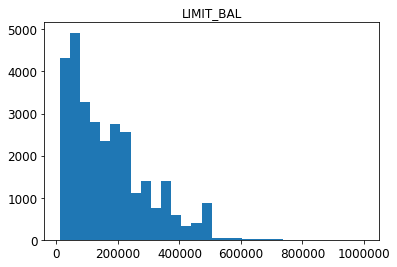

In [9]:
plt.hist(x = df['LIMIT_BAL'], bins = 30)
plt.title("LIMIT_BAL")

plt.show()

Heavily left skrewed, should normalize

In [10]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

More females than male

In [11]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

There are some with EDUCATION = 0, 5 and 6. Can group them into 4, the Other category.

In [12]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

There are some with MARRIAGE = 0. Can group them into 3, the Other category.

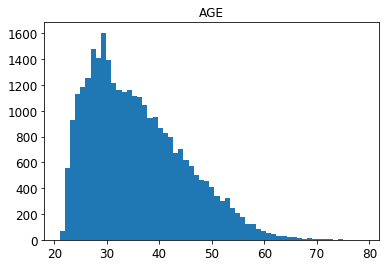

In [13]:
plt.hist(x = df['AGE'], bins = 59)
plt.title("AGE")

plt.show()

Mode is around age 30

In [14]:
df['DEFAULT'].sum() / len(df['DEFAULT'])

0.2212

The class ratio is around 22%

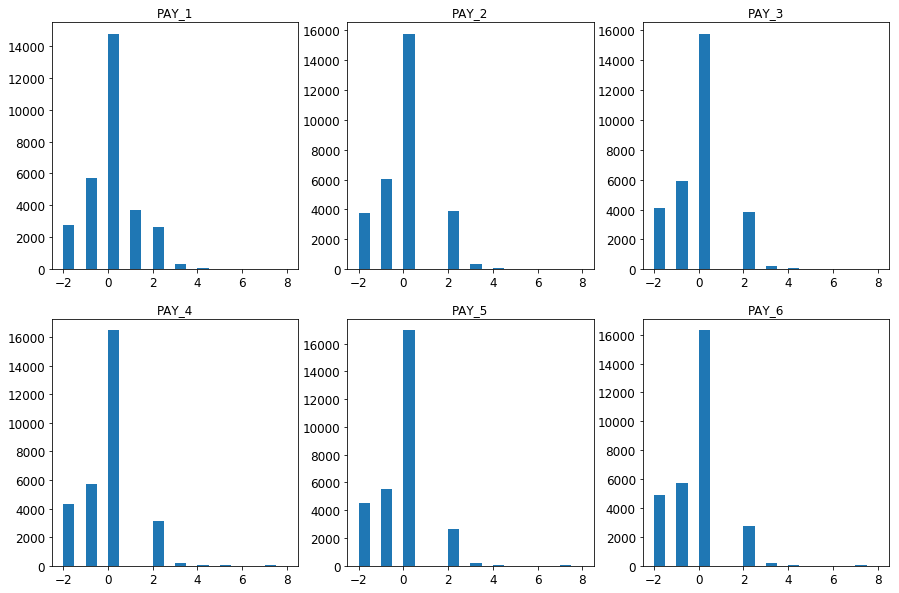

In [15]:
fig = plt.figure(figsize = (15, 10))

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(x = df["PAY_" + str(i)], bins = 20)
    ax.set_title("PAY_" + str(i))

plt.show()

What is -2?

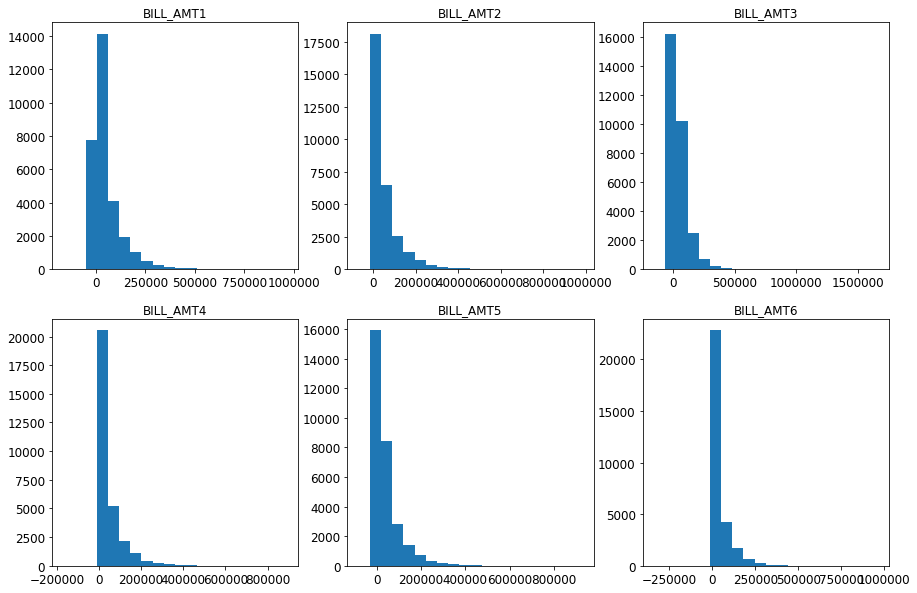

In [16]:
fig = plt.figure(figsize = (15, 10))

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(x = df["BILL_AMT" + str(i)], bins = 20)
    ax.set_title("BILL_AMT" + str(i))

plt.show()

Some balances are negative, also too right tailed, should normalize

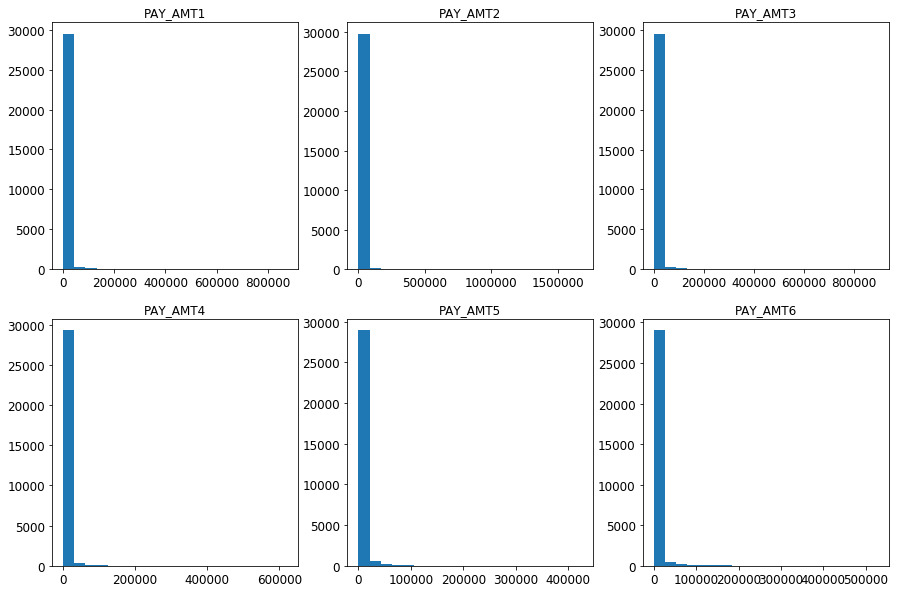

In [17]:
fig = plt.figure(figsize = (15, 10))

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(x = df["PAY_AMT" + str(i)], bins = 20)
    ax.set_title("PAY_AMT" + str(i))

plt.show()

Payment amount is too right tailed, should normalize

# Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train = df_train.copy()
df_test = df_test.copy()

In [19]:
df_train.shape

(24000, 24)

In [20]:
df_test.shape

(6000, 24)

In [21]:
df_train['DEFAULT'].sum() / len(df_train['DEFAULT'])

0.22179166666666666

In [22]:
df_test['DEFAULT'].sum() / len(df_test['DEFAULT'])

0.21883333333333332

Class ratios for both training and test set are fairly similar

# Data Cleaning Pipeline

In [23]:
# Get attributes

cat_attribs = ["SEX","EDUCATION","MARRIAGE"]

num_attribs = list(df.columns.drop(cat_attribs
                                   + ["DEFAULT"]))

num_attribs_for_norm = list(df.columns.drop(cat_attribs
                                            + ["DEFAULT"]
                                            + ["PAY_" + str(i) for i in range(1, 7)]
                                            + ["AGE"]))

print(cat_attribs)
print(num_attribs)
print(num_attribs_for_norm)

['SEX', 'EDUCATION', 'MARRIAGE']
['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [24]:
# Re-categorize EDUCATION and MARRIAGE

def recategorize(X):
    X.loc[(X["EDUCATION"] == 0) | (X["EDUCATION"] == 5) | (X["EDUCATION"] == 6), "EDUCATION"] = 4
    X.loc[X["MARRIAGE"] == 0, "MARRIAGE"] = 3
    
    return X

In [25]:
# Full pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

full_pipeline = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), num_attribs_for_norm),
    ('recategorize', FunctionTransformer(recategorize, validate = False), cat_attribs),
    ("one_hot", OneHotEncoder(categories = 'auto'), cat_attribs),
])

# Clean Data

In [26]:
df_train_prepared = full_pipeline.fit_transform(df_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
df_test_prepared = full_pipeline.fit_transform(df_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [27]:
- Cross-validation with 5-folds
#Did you get different results compared to the 4-fold case?

SyntaxError: invalid syntax (<ipython-input-27-d949bc915d94>, line 1)

#### Conclusions?

Explain your results and choices

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

### Conclusions
